In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
show_data = pd.read_csv("/content/ds_salaries.csv")
data = pd.read_csv("/content/ds_salaries.csv")

In [5]:
data = data.iloc[:,1:]
data = data.drop('salary',axis = 1)

In [6]:
data.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


In [7]:
data.corr()

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_currency     607 non-null    object
 5   salary_in_usd       607 non-null    int64 
 6   employee_residence  607 non-null    object
 7   remote_ratio        607 non-null    int64 
 8   company_location    607 non-null    object
 9   company_size        607 non-null    object
dtypes: int64(3), object(7)
memory usage: 47.5+ KB


In [9]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [10]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
data['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

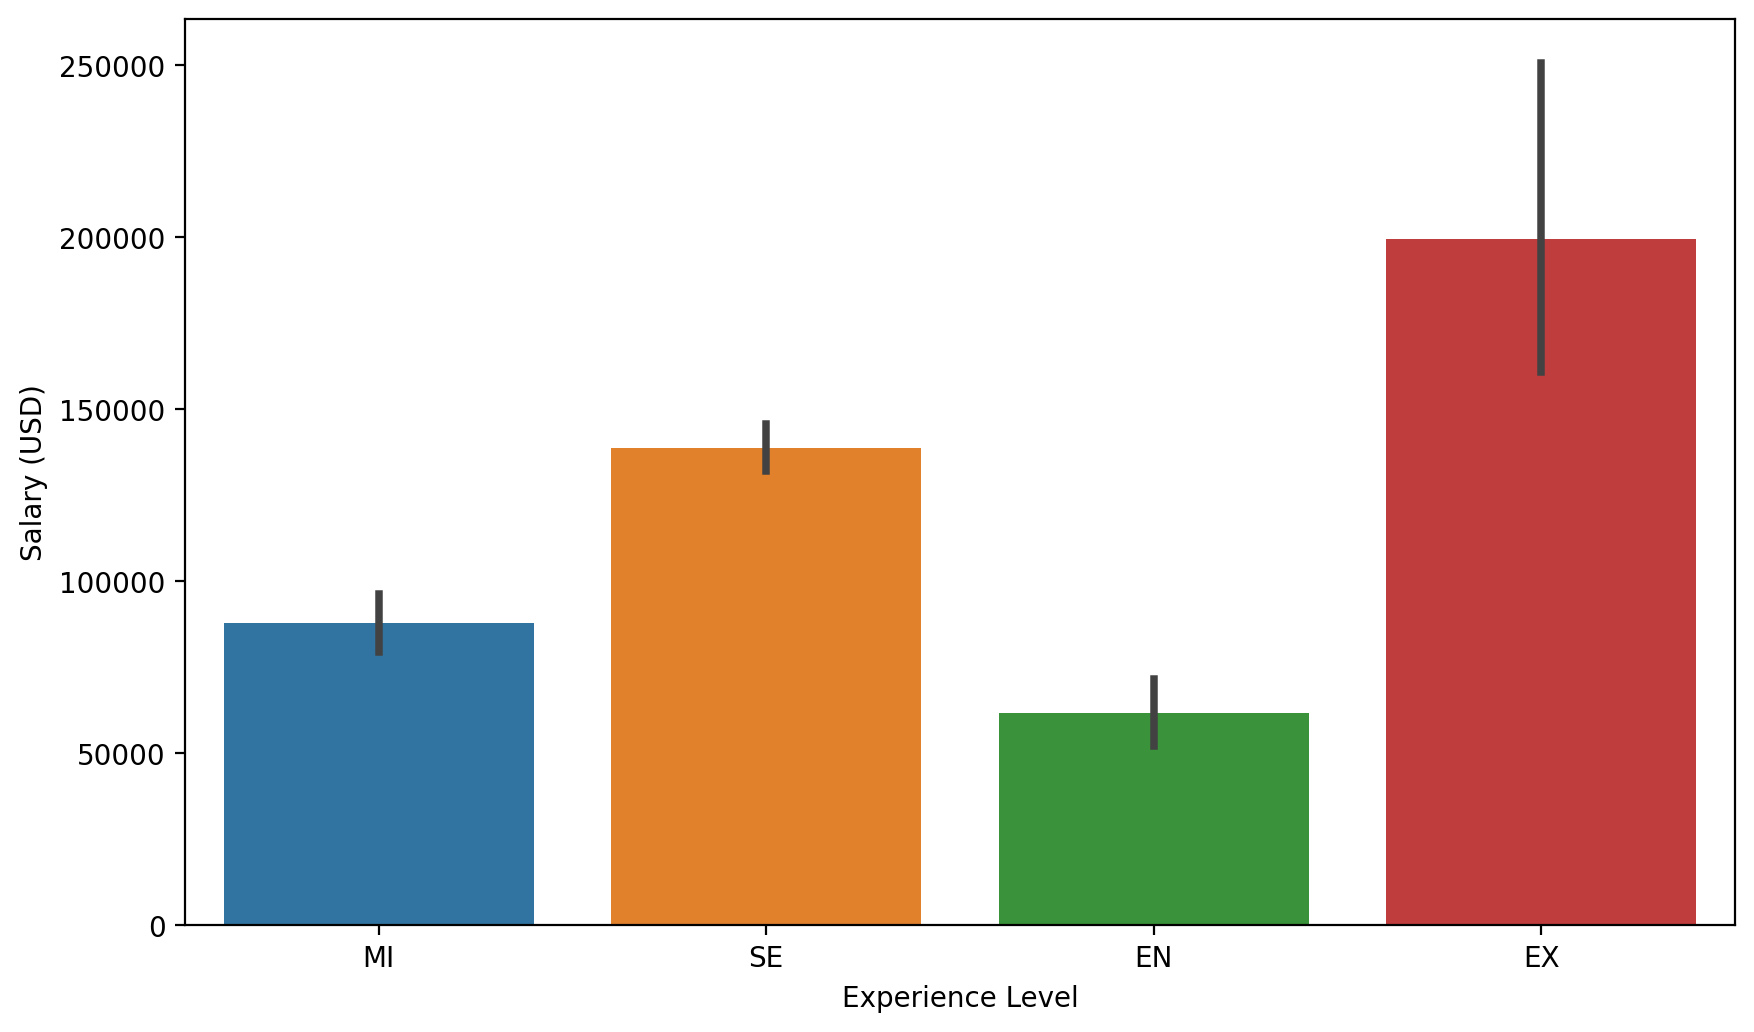

In [14]:
plt.figure(figsize = (10,6),dpi = 200)
ax = sns.barplot(x = 'experience_level',y = 'salary_in_usd',data = data)
ax.set(xlabel='Experience Level',
       ylabel='Salary (USD)');

In [15]:
data['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [16]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [17]:
from sklearn.preprocessing import OneHotEncoder
categorical_column_list = list(data.select_dtypes(include=['object']).columns)

data = pd.get_dummies(data , columns= categorical_column_list)
data

,work_year,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2020,79833,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2020,260000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2020,109024,50,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2020,20000,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2020,150000,50,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
603,2022,126000,100,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
604,2022,129000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
605,2022,150000,100,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0


# ANN (Scaling and Train Test Split)

In [18]:
X = data.drop('salary_in_usd',axis = 1)
y = data['salary_in_usd']

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train.shape

(424, 187)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model = Sequential()
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.add(Dense(187,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(187,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(187,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
14/14 [==============================] - 3s 14ms/step - loss: 17810257920.0000 - val_loss: 17235197952.0000
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 17807767552.0000 - val_loss: 17229043712.0000
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 17794473984.0000 - val_loss: 17198759936.0000
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 17737988096.0000 - val_loss: 17087188992.0000
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 17558427648.0000 - val_loss: 16763333632.0000
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 17084002304.0000 - val_loss: 16006151168.0000
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 16097309696.0000 - val_loss: 14522077184.0000
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 14339582976.0000 - val_loss: 12073766912.0000
Epoch 9/100
14/14 [============================

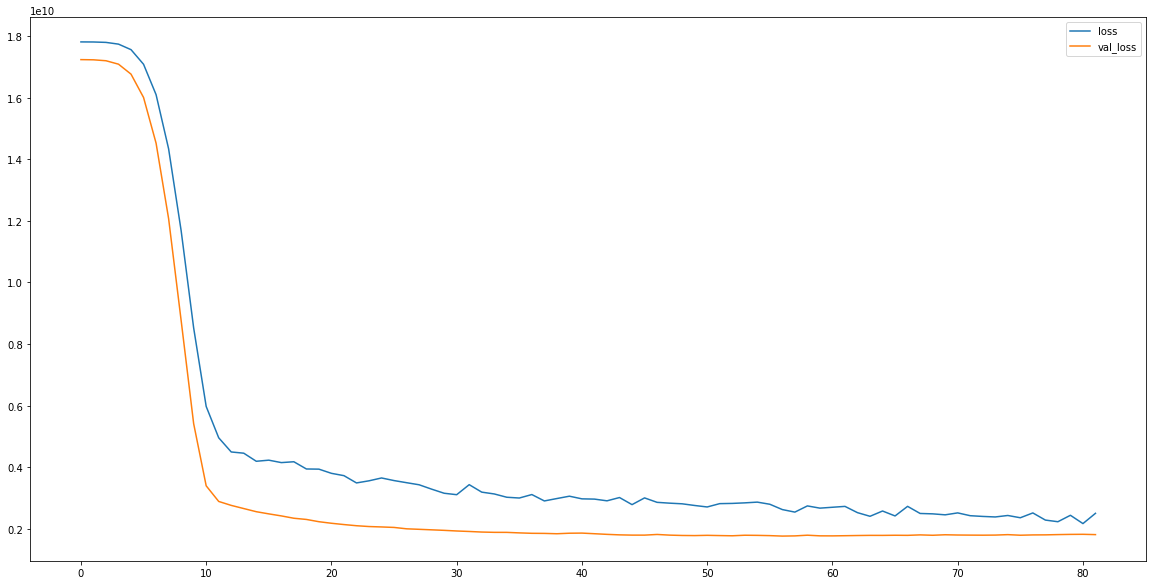

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize = (20,10));

# Evaluation on Test Data


In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

predictions = model.predict(X_test)

print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
print('Variance Score: {}'.format(explained_variance_score(y_test,predictions)))

MSE: 1813699086.2109861
MAE: 31100.07444721493
Variance Score: 0.5457871663104777


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


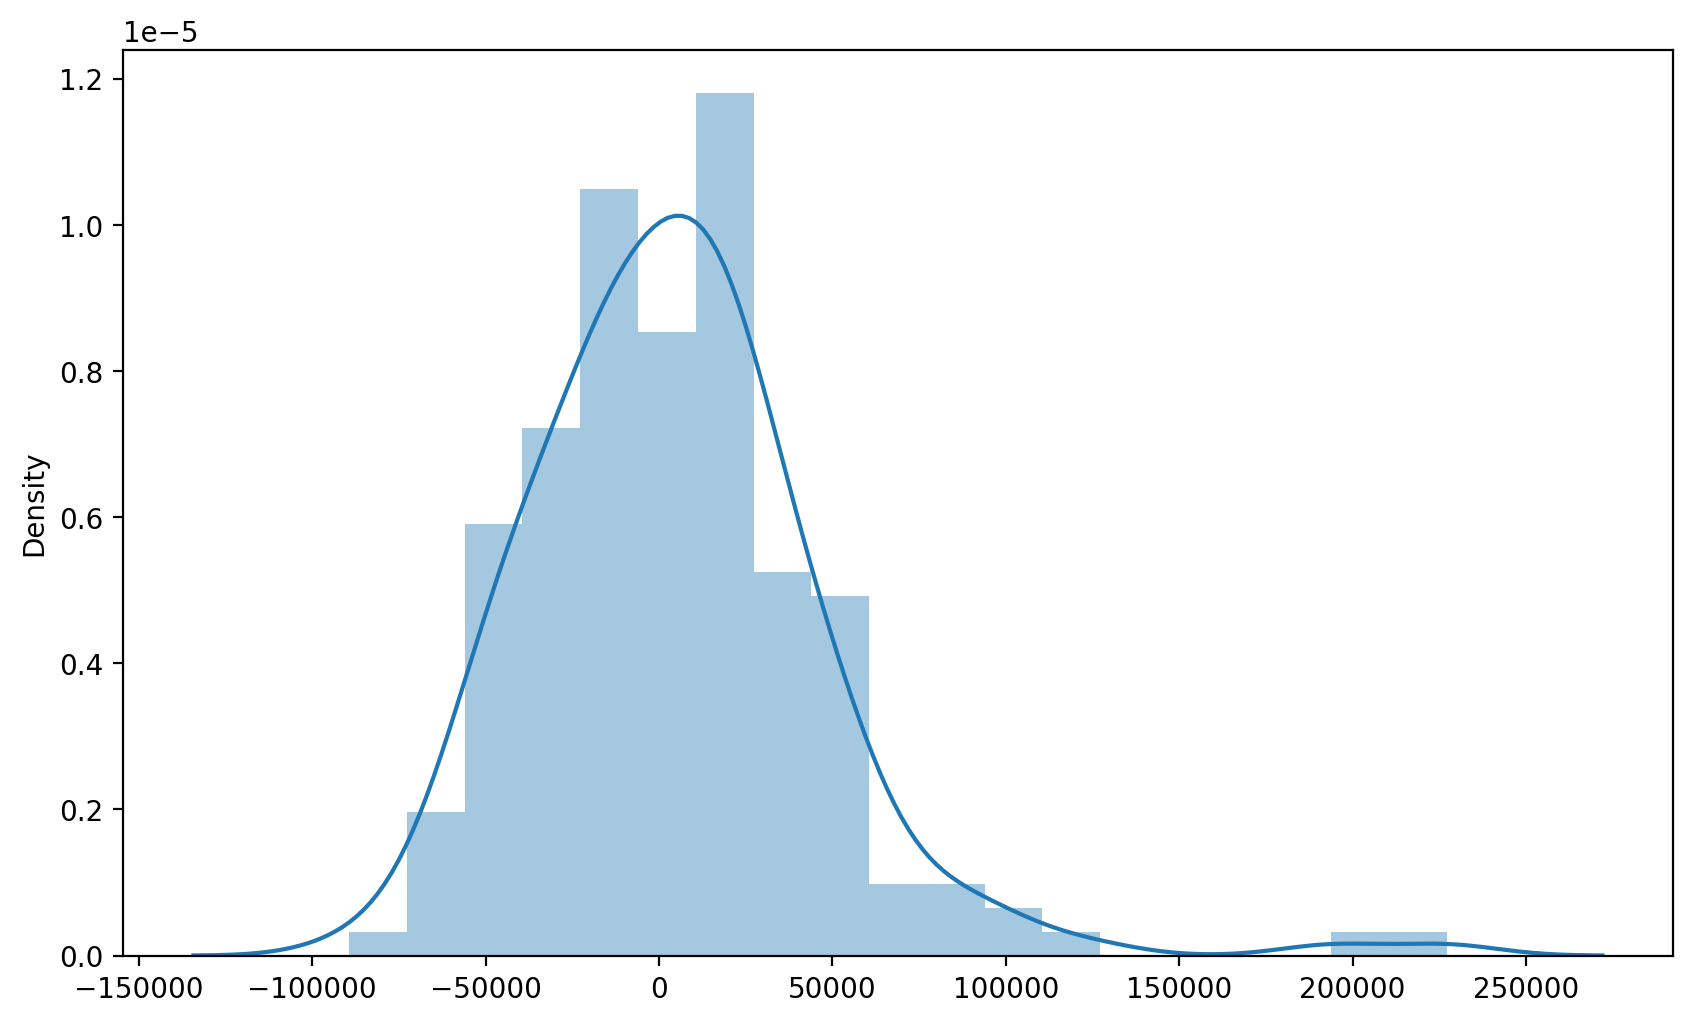

In [59]:
errors = y_test.values.reshape(183, 1) - predictions
plt.figure(figsize = (10,6),dpi = 200)
sns.distplot(errors);

In [64]:
single_job = data.drop('salary_in_usd',axis = 1).iloc[0]

In [65]:
single_job = scaler.transform(single_job.values.reshape(-1, 187))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [67]:
model.predict(single_job)

array([[81405.58]], dtype=float32)

In [70]:
show_data.iloc[0]

Unnamed: 0                         0
work_year                       2020
experience_level                  MI
employment_type                   FT
job_title             Data Scientist
salary                         70000
salary_currency                  EUR
salary_in_usd                  79833
employee_residence                DE
remote_ratio                       0
company_location                  DE
company_size                       L
Name: 0, dtype: object